In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

import numpy as np
import FirstConstructions as fc
%load_ext autoreload
%autoreload 2

Dataset: X = (150, 4)   y = (150,)
Train: 105
Test: 45


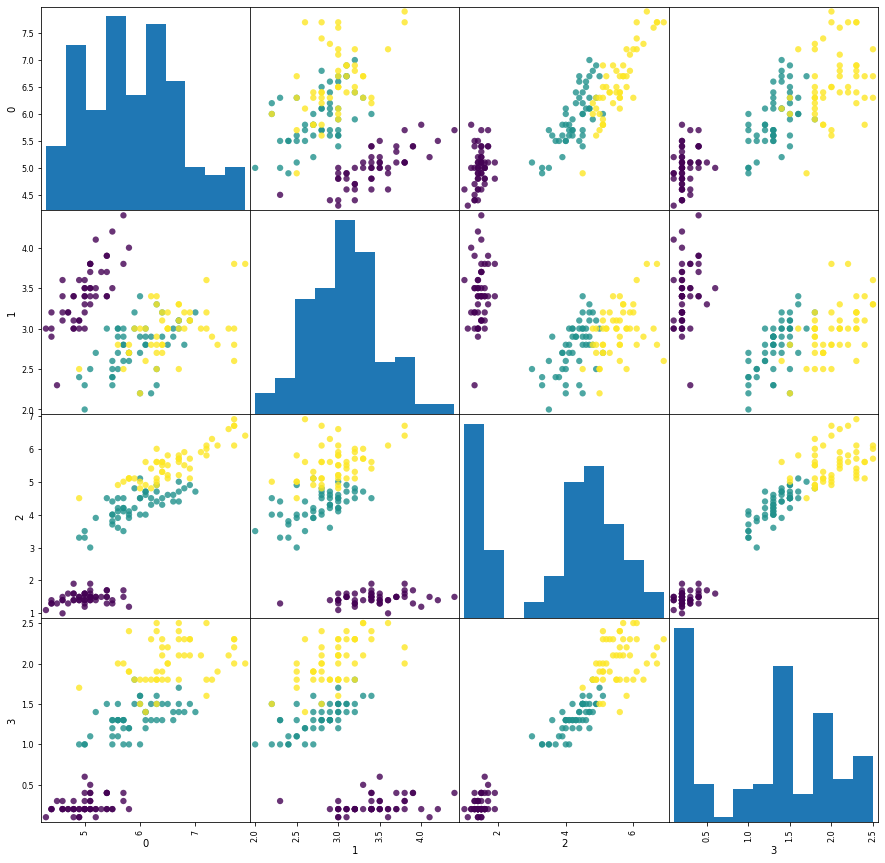

In [2]:
X, y = fc.getDataset(4)
print("Dataset: X =", X.shape, "  y =",y.shape)
X_train, X_test, y_train, y_test = fc.splitDataset(X, y, 0.3)
print("Train:", X_train.shape[0])
print("Test:", X_test.shape[0])
fc.DrawDataset(X, y)

In [10]:
metric = fc.getMetric(1)
kernel = fc.getKernel(0)
h = fc.calculateH(X, metric)*0.25
print(h)

X_train, y_train = fc.ReshuffleDataset(X_train, y_train)
print("Accuracy (full/full) =",fc.accuracy(X, y, np.ones(len(y)), h, metric, kernel, X, y)) #oneslike
print("Accuracy (Train/test) =",fc.accuracy(X_train, y_train, np.ones(len(y_train)), h, metric, kernel, X_test, y_test))

1.7712989583918353
Accuracy (full/full) = 0.9666666666666667
Accuracy (Train/test) = 1.0


In [11]:
#X_train, y_train = fc.ReshuffleDataset(X_train, y_train)
weight = fc.weightFit(X_train, y_train, h, metric, kernel, iterationNumber=1)
print("Accuracy (self)=",fc.accuracy(X_train, y_train, weight, h, metric, kernel, X_train, y_train))
print("Accuracy =",fc.accuracy(X_train, y_train, weight, h, metric, kernel, X_test, y_test))

Accuracy (self)= 0.9714285714285714
Accuracy = 0.9777777777777777


15


c:\Users\Степан\Desktop\учеба\4 курс\ML\FirstConstructions.py:107: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  


<function matplotlib.pyplot.show(close=None, block=None)>

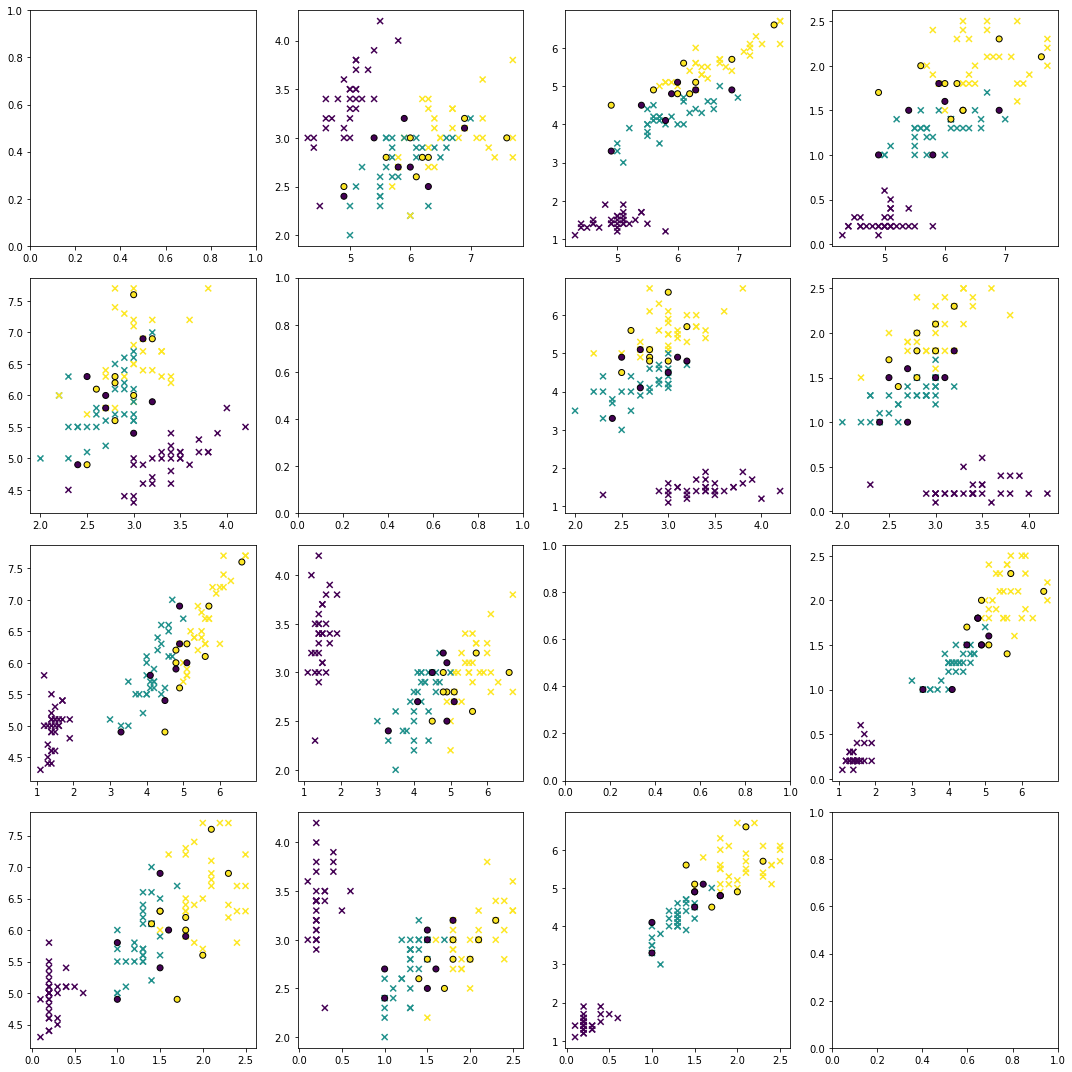

In [12]:
print(np.sum([1 if weight[i]>0 else 0 for i in range(len(weight))]))


non_zero_ids = [i for i in np.arange(weight.shape[0]) if weight[i] > 0]
zero_ids = [i for i in np.arange(weight.shape[0]) if weight[i] == 0]
fc.DrawDatasetW(X_train[zero_ids], y_train[zero_ids], 'x')
fc.DrawDatasetW(X_train[non_zero_ids], y_train[non_zero_ids], 'o')
plt.show

In [15]:
pNum = 30
process = 0
dist = fc.calculateH(X, metric)
params = [0,0,0,0]
for i in range(1,3):
    for j in range(0,5):
        for k in range(1,100):
            for l in range(1,2):
                metric = fc.getMetric(i)
                kernel = fc.getKernel(j)
                h = dist*k/100
                weight = fc.weightFit(X_train, y_train, h, metric, kernel, iterationNumber=l)
                hmp = fc.HowMuchPurple(weight, y_train)
                if (hmp < pNum):
                    pNum = hmp
                    params[0] = i
                    params[1] = j
                    params[2] = k
                    params[3] = l
            process +=1
            print(process / 3600)
print(pNum)

0.0002777777777777778
0.0005555555555555556
0.0008333333333333334
0.0011111111111111111
0.001388888888888889
0.0016666666666666668
0.0019444444444444444
0.0022222222222222222
0.0025
0.002777777777777778
0.0030555555555555557
0.0033333333333333335
0.003611111111111111
0.0038888888888888888
0.004166666666666667
0.0044444444444444444
0.004722222222222222
0.005
0.005277777777777778
0.005555555555555556
0.005833333333333334
0.006111111111111111
0.006388888888888889
0.006666666666666667
0.006944444444444444
0.007222222222222222
0.0075
0.0077777777777777776
0.008055555555555555
0.008333333333333333
0.008611111111111111
0.008888888888888889
0.009166666666666667
0.009444444444444445
0.009722222222222222
0.01
0.010277777777777778
0.010555555555555556
0.010833333333333334
0.011111111111111112
0.01138888888888889
0.011666666666666667
0.011944444444444445
0.012222222222222223
0.0125
0.012777777777777779
0.013055555555555556
0.013333333333333334
0.01361111111111111
0.013888888888888888
0.01416666666

In [16]:
print(params)

[1, 0, 32, 1]


In [14]:
print("1,4,34,1    4")

1,4,34,1    4


In [17]:
print("1, 0, 32, 1     3")

1, 0, 32, 1     3
